In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/Lenovo/Downloads/ts.csv",header=None)

#Air passengers data 

In [2]:
A.columns = ["Month","No_Passengers"]

In [3]:
A.head()

,Month,No_Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
A.index = pd.to_datetime(A.Month,format="%Y-%m")

In [5]:
A = A.drop(labels=["Month"],axis=1)

In [6]:
A.head()

,No_Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


1958,1959,1960 --> 1961? Yt ~ Yt-1,Yt-2.....

Text(0.5, 1.0, 'Passengers travelled through airlines from 1949-1960')

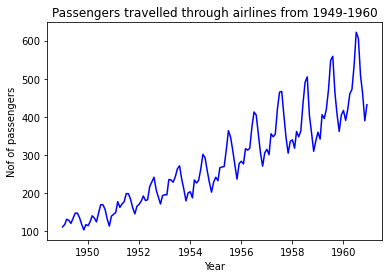

In [7]:
from matplotlib.pyplot import plot,xlabel,ylabel,title
plot(A,c="blue")
xlabel("Year")
ylabel("Nof of passengers")
title("Passengers travelled through airlines from 1949-1960")

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
B = seasonal_decompose(A,"multiplicative")

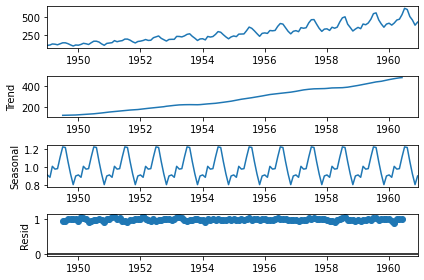

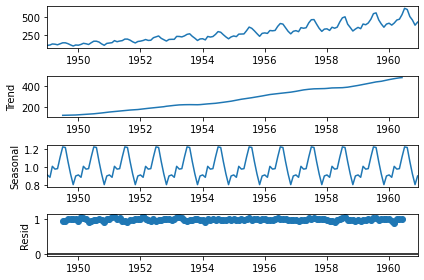

In [9]:
B.plot()

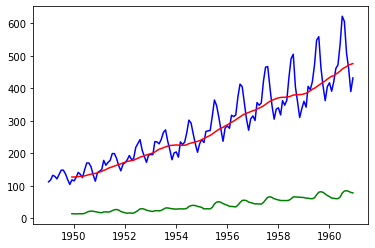

In [10]:
plot(A,c="blue")
plot(A.rolling(window=12).mean(),c="red")
plot(A.rolling(window=12).std(),c="green")

In [11]:
from numpy import log

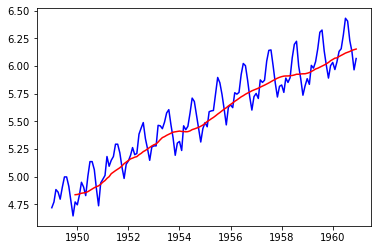

In [12]:
B = log(A)
plot(B,c="blue")
plot(B.rolling(window=12).mean(),c="red")

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mm = MinMaxScaler()
C = pd.DataFrame(mm.fit_transform(A),index=A.index,columns=["Pass"])

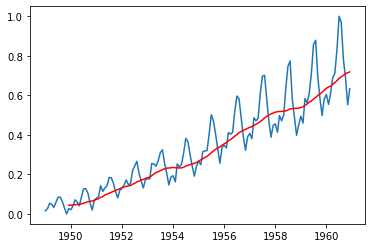

In [14]:
plot(C)
plot(C.rolling(window=12).mean(),c="red")

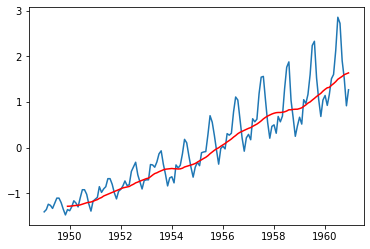

In [15]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss = StandardScaler()
D = pd.DataFrame(ss.fit_transform(A),index=A.index,columns=["Pass"])
plot(D)
plot(D.rolling(window=12).mean(),c="red")

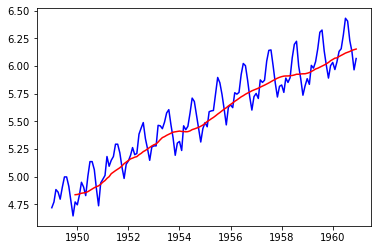

In [16]:
B = log(A)
plot(B,c="blue")
plot(B.rolling(window=12).mean(),c="red")

In [17]:
C = B.rolling(window=12).mean()
D = B - C

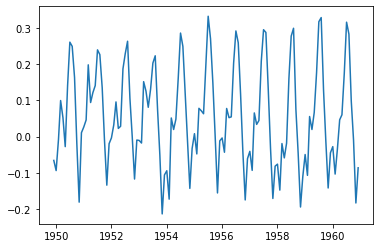

In [18]:
plot(D)

In [19]:
E = D[D.No_Passengers.isnull() == False]

In [20]:
from statsmodels.tsa.stattools import adfuller
adfuller(E)[1]

0.022234630001243844

In [21]:
adfuller(A)[1]

0.9918802434376409

# Training and testing set

In [22]:
from numpy import round
sizets=int(round(E.count()*0.2))
sizetr=int(round(E.count()*0.8))

In [23]:
trd = E[0:sizetr]
tsd = E[sizetr:E.shape[0]]

In [24]:
tsd.tail()

,No_Passengers
Month,
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230
1960-11-01,-0.182690
1960-12-01,-0.085789


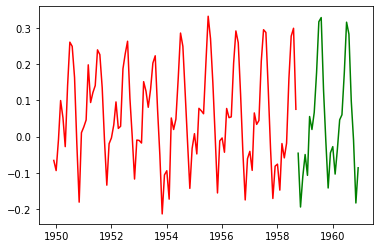

In [25]:
plot(trd,c="red")
plot(tsd,c="green")

In [26]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="1958-08-01",end="1960-12-01")

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

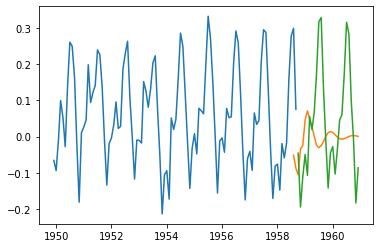

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(trd,order=[5,1,1]).fit()
pred = model.predict(start="1958-08-01",end="1960-12-01")
plot(trd)
plot(pred)
plot(tsd)

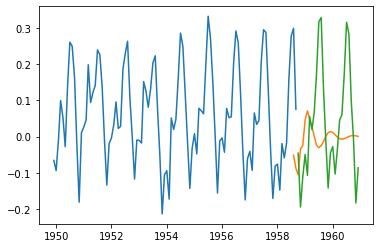

In [28]:
plot(trd)
plot(pred)
plot(tsd)

In [29]:
pred

1958-08-01   -0.051267
1958-09-01   -0.086539
1958-10-01   -0.105207
1958-11-01   -0.033900
1958-12-01   -0.024557
1959-01-01    0.045946
1959-02-01    0.071039
1959-03-01    0.048366
1959-04-01    0.027988
1959-05-01    0.000946
1959-06-01   -0.023914
1959-07-01   -0.030457
1959-08-01   -0.024787
1959-09-01   -0.013054
1959-10-01    0.001032
1959-11-01    0.010983
1959-12-01    0.014004
1960-01-01    0.011353
1960-02-01    0.005259
1960-03-01   -0.001309
1960-04-01   -0.005746
1960-05-01   -0.007064
1960-06-01   -0.005635
1960-07-01   -0.002647
1960-08-01    0.000419
1960-09-01    0.002440
1960-10-01    0.002975
1960-11-01    0.002217
1960-12-01    0.000772
Freq: MS, dtype: float64